# Data 602: Assignment 9
## by Catherine Cho

In [36]:
import plotly.express as px

#### Dataset tips is imported

In [37]:
df = px.data.tips()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Bar Plot

#### Some noteworthy features shown in the bar plot below is that for both gender groups, non-smokers generally had larger total bills. The male data points were generally greater overall. The second bar plot breaks down the barplots further  

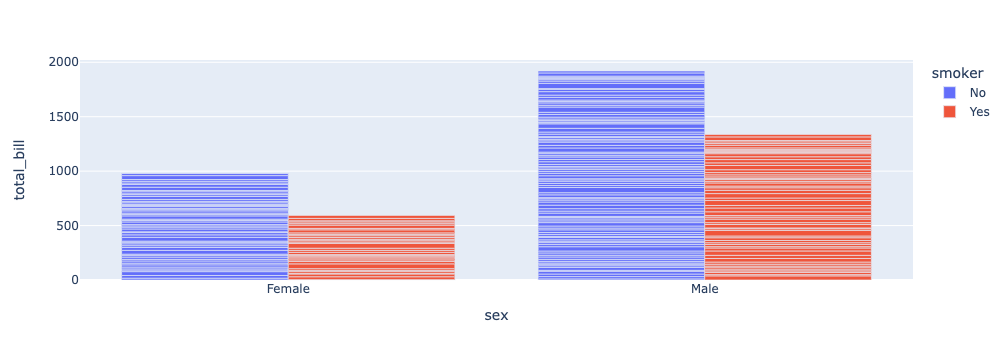

In [38]:
# color distinguishes whether smoker or not. The barmode is set to group so each bar is grouped under each gender type. 
fig = px.bar(df, x = 'sex', y = 'total_bill', barmode = 'group', color = 'smoker')
fig.show()

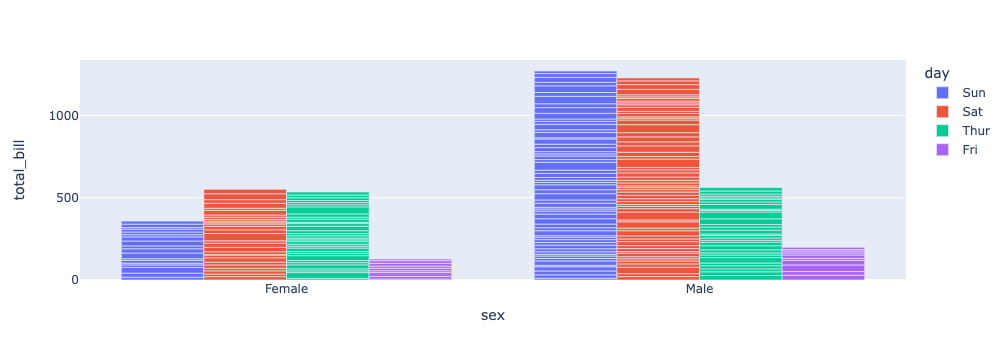

In [39]:
# same as previous plot but color is assigned to day.
fig = px.bar(df, x = 'sex', y = 'total_bill', barmode = 'group', color = 'day')
fig.show()

### Scatter Plot

#### The scatter plot shows two subplots for smokers vs non-smokers. There is a stronger positive correlation of tip vs total_bill for non-smokers. 

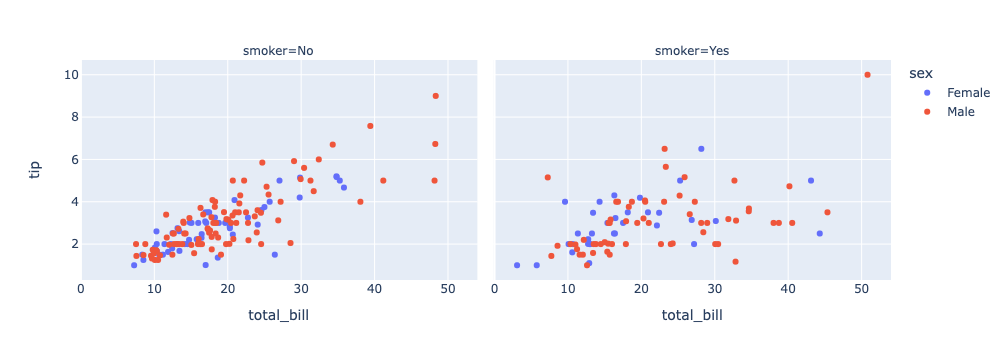

In [40]:
# facet_col can be defined to plot sub-plots. 
fig = px.scatter(df, x = 'total_bill', y = 'tip', color = 'sex', facet_col = 'smoker')
fig.show()

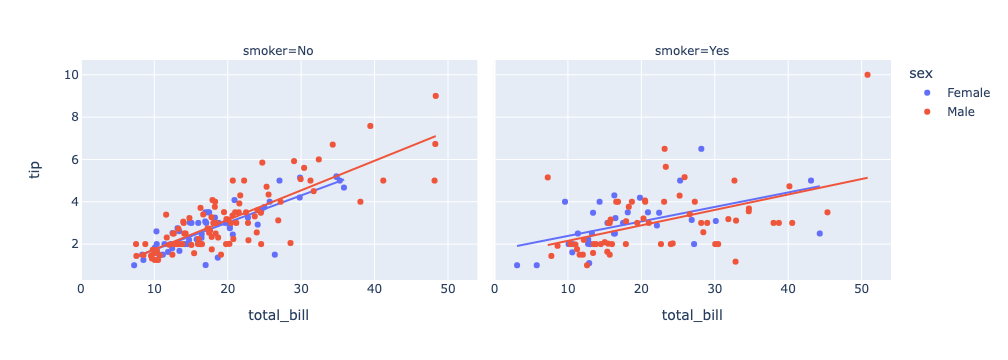

In [41]:
# The best fit line is drawn by defining a trendline
fig = px.scatter(df, x = 'total_bill', y = 'tip', color = 'sex', facet_col = 'smoker', trendline = 'ols')
fig.show()

category


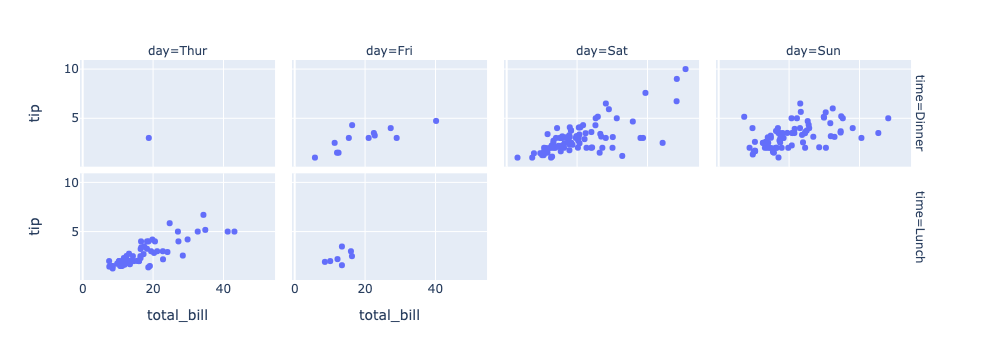

In [42]:
#sort order of days to thursday, friday, sunday, saturday by importing CategoricalDtypes. This is useful in ordering categorical data.
from pandas.api.types import CategoricalDtype

# custom categorical type is created. Second argument sets ordered to be true so it knows it is categorically ordered. 
cat_date_order = CategoricalDtype(['Thur', 'Fri', 'Sat', 'Sun'], ordered = True)

# The csutom categorical order is cast onto the values in column 'day'. 
df['day'] = df['day'].astype(cat_date_order)

# A sort_values() function will sort by new categorical order of day and time by alphabetical order. 
df.sort_values(by = ['day','time'], inplace = True)
print(cat_date_order)
fig = px.scatter(df, x = 'total_bill', y = 'tip', facet_col = 'day', facet_row = 'time')
fig.show()

### Histogram

#### The histogram of tips shows a skew to the right where the mean is less than the median. There are generally more exception occurrences at the higher tip values than less. The rug plot shows the overall distribution of the data points. 

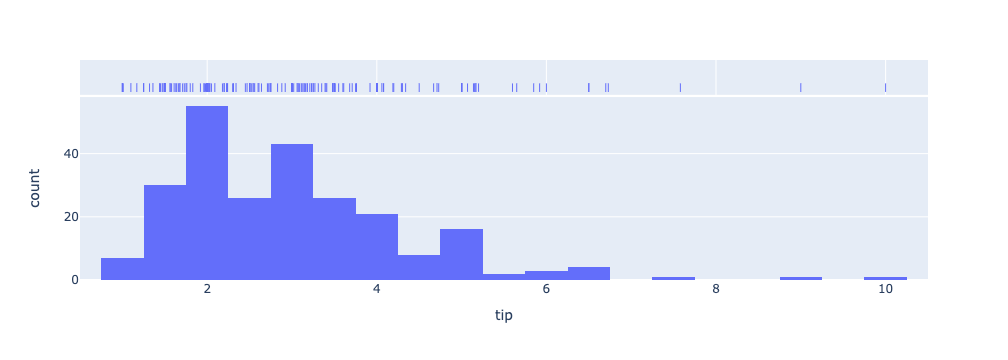

In [48]:
# histogram plotted with rub plot
fig = px.histogram(df, x = 'tip', marginal = 'rug')
fig.show()

### Box Plot

#### The box plots are plotted for tips for smokers and non-smokers. There are greater outliers for those that smoke but generally the median and quartile values are fairly similar between both groups. 

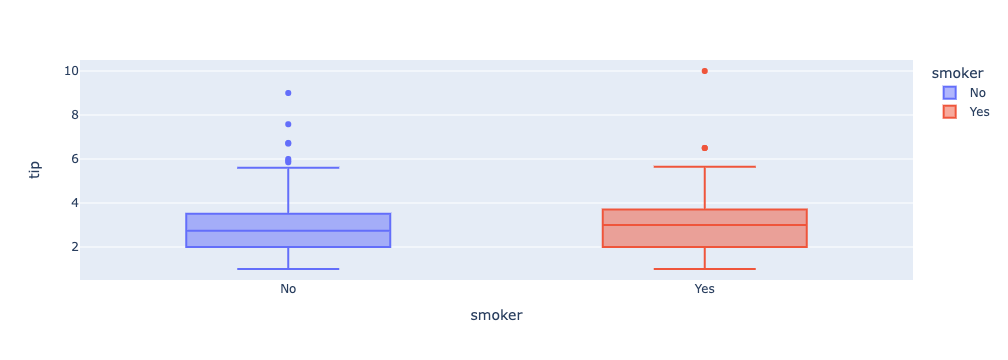

In [49]:
# box plot which is plotted for those that smoke and don't smoke. 
fig = px.box(df, x = 'smoker', y = 'tip', color = 'smoker')
fig.show()